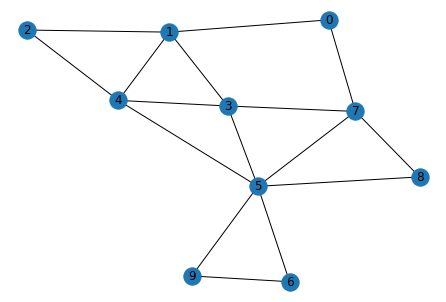

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import write_dot

G = nx.Graph()

G.add_edge(0, 1)
G.add_edge(0, 7)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)

G.add_edge(2, 4)

G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(3, 7)

G.add_edge(4, 5)

G.add_edge(5, 6)
G.add_edge(5, 9)
G.add_edge(5, 8)
G.add_edge(5, 7)

G.add_edge(6, 9)

G.add_edge(7, 8)

eul = list(nx.eulerian_circuit(G))

nx.draw(G, with_labels = True)
plt.show()

In [51]:
G = nx.Graph()

G.add_edge(0, 1)
G.add_edge(0, 7)
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 4)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(3, 7)
G.add_edge(4, 5)
G.add_edge(5, 6)
G.add_edge(5, 9)
G.add_edge(5, 8)
G.add_edge(5, 7)
G.add_edge(6, 9)
G.add_edge(7, 8)


def eulerian_circuit(G: nx.Graph):
    F = list(G.edges())
    v = random.choice(list(G.nodes()))
    K = list(G.edges(v))
    e = random.choice(K)

    while len(F) > 0:
        (left, right) = e
        print(
            'v=' + str(v),
            'F=' + str(F),
            'e=' + str((left, right)),
            'K=' + str(K),
            sep='; '
          )

        # Remove Edge from Graph
        G.remove_edge(left, right)

        F = list(G.edges())

        # go to next node
        v = right

        # Add edges from v
        local_edges = list(G.edges(v))
        for (first, second) in local_edges:
            if not (first,second) in K and not (second, first) in K:
                K.append((first, second))

        # Choose random edge, which is not a bridge
        # If there is only one edge, we don't care if its a bridge
        if len(local_edges) == 1:
            e = local_edges[0]
        elif len(local_edges) == 0:
            continue
        else:
            # Choose an edge, which is not a bridge
            e = random.choice(local_edges)
            while e in list(nx.bridges(G)):
                e = random.choice(local_edges)
    return K

own_eul = eulerian_circuit(G)
print(len(own_eul))
print(own_eul)

for (left, right) in own_eul:
    if not (left,right) in eul and not (right, left) in eul:
        print("Not the same")
        break


v=5; F=[(0, 1), (0, 7), (1, 2), (1, 3), (1, 4), (7, 3), (7, 5), (7, 8), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6), (5, 9), (5, 8), (6, 9)]; e=(5, 8); K=[(5, 3), (5, 4), (5, 6), (5, 9), (5, 8), (5, 7)]
v=8; F=[(0, 1), (0, 7), (1, 2), (1, 3), (1, 4), (7, 3), (7, 5), (7, 8), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6), (5, 9), (6, 9)]; e=(8, 7); K=[(5, 3), (5, 4), (5, 6), (5, 9), (5, 8), (5, 7), (8, 7)]
v=7; F=[(0, 1), (0, 7), (1, 2), (1, 3), (1, 4), (7, 3), (7, 5), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6), (5, 9), (6, 9)]; e=(7, 0); K=[(5, 3), (5, 4), (5, 6), (5, 9), (5, 8), (5, 7), (8, 7), (7, 0), (7, 3)]
v=0; F=[(0, 1), (1, 2), (1, 3), (1, 4), (7, 3), (7, 5), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6), (5, 9), (6, 9)]; e=(0, 1); K=[(5, 3), (5, 4), (5, 6), (5, 9), (5, 8), (5, 7), (8, 7), (7, 0), (7, 3), (0, 1)]
v=1; F=[(1, 2), (1, 3), (1, 4), (7, 3), (7, 5), (2, 4), (3, 4), (3, 5), (4, 5), (5, 6), (5, 9), (6, 9)]; e=(1, 3); K=[(5, 3), (5, 4), (5, 6), (5, 9), (5, 8), (5, 7), (8, 7), (7, 0), (7, 3), (0

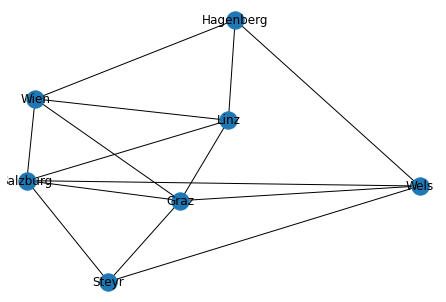

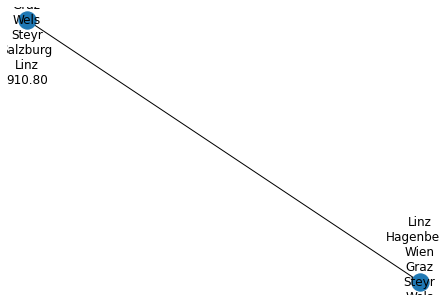

Linz
Hagenberg
Wien
Graz
Steyr
Wels
Salzburg
Linz
879.80

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import write_dot
import random
from operator import attrgetter

G = nx.Graph()
G.add_weighted_edges_from([
    ("Wien", "Linz",184.4),
    ("Wien", "Hagenberg",180),
    ("Wien", "Graz",200.1),
    ("Wien", "Salzburg",295),
    ("Linz", "Hagenberg",23),
    ("Linz", "Graz",220.9),
    ("Linz", "Salzburg",132.5),
    ("Salzburg", "Steyr",134),
    ("Salzburg", "Graz",296),
    ("Salzburg", "Wels",108),
    ("Graz", "Steyr",191),
    ("Graz", "Wels",196),
    ("Wels", "Steyr",45.2),
    ("Wels", "Hagenberg",57.2)
])

nx.draw(G, with_labels = True)
plt.show()

def is_valid_path(G: nx.Graph, path: list):
        edges = list(zip(path, path[1::]))
        all_edges_valid = True
        for u, v in edges:
            if not G.has_edge(u, v):
                all_edges_valid = False
        return all_edges_valid

def find_random_hamilton_circuit(G: nx.Graph, starting_node: str, max_iterations = 100):
    is_hamilton_circuit = False
    i = 0
    potential_path = None
    while not is_hamilton_circuit and i < max_iterations:
        i += 1
        potential_path = [node for node in G.nodes()
                          if node != starting_node]

        random.shuffle(potential_path)
        potential_path.insert(0, starting_node)
        potential_path.append(starting_node)
        is_hamilton_circuit = is_valid_path(G, potential_path)

        if not is_hamilton_circuit:
            potential_path = None
    return potential_path


class swap2Node:
    def __init__(self, hamilton_circuit, distance):
        self.hamilton_circuit = hamilton_circuit
        self.distance = distance

    def __repr__(self):
        return "\n".join(self.hamilton_circuit) + "\n" + "%.2f" % self.distance

    def __eq__(self, other):
        return hash(self) == hash(other)

    def __ne__(self, other):
        return not self == other

    def __hash__(self):
        return hash(self.distance) + hash(" ".join(self.hamilton_circuit))

def swap2(G: nx.Graph, starting_node: str):
    get_total_weight = lambda x : sum([G[u][v]["weight"] for u, v in list(zip(x, x[1::]))])
    hamilton_circuit = find_random_hamilton_circuit(G, starting_node)
    if hamilton_circuit is None:
        print("No hamilton circuit found")
        return

    distance = get_total_weight(hamilton_circuit)
    first_solution = swap2Node(hamilton_circuit[:], distance)
    swap2_graph = nx.Graph()
    swap2_graph.add_node(first_solution)
    find_another_solution = True
    while find_another_solution:
        calculated_solutions = []
        len_circuit = len(first_solution.hamilton_circuit) - 2
        for j in range(1, len_circuit):
            for k in range(j + 1, len_circuit):
                alt_path = first_solution.hamilton_circuit[:]
                alt_path[j], alt_path[k] = alt_path[k], alt_path[j]
                if is_valid_path(G, alt_path):
                    new_node = swap2Node(alt_path[:], get_total_weight(alt_path))
                    swap2_graph.add_edge(first_solution, new_node)
                    calculated_solutions.append(new_node)

        if len(calculated_solutions) == 0:
            find_another_solution = False
        min_solution = min(calculated_solutions, key=attrgetter("distance"))
        if min_solution is not None and min_solution.distance < first_solution.distance:
            first_solution = min_solution
        else:
            find_another_solution = False

    nx.draw(swap2_graph, with_labels = True)
    plt.show()
    write_dot(swap2_graph, "./swap2_graph.dot")
    return first_solution

swap2(G, "Linz")